# <cite><font color="C32F23">Manipulation de fichiers et traitement de données sous Python avec Pandas</font></cite>

<div style="border:thin solid orange">
</div>

Carnus - K. Boudjelaba

Contact : <font size="4"><a href="mailto:k.boudjelaba@carnus.fr" class="button"><span class="delete">Mail</span></a></font>

Lien utile : <font size="4"><a href="https:www.carnus.fr" class="button"><span class="user">Lycée Charles Carnus</span></a></font>
   
<img src="https://github.com/boudjelaba/Utiles/blob/main/Logo/Carnus_1.png?raw=true"
     alt="Logo Carnus"
     style="float: right; margin-right: 380px;" 
     width=100cm  />

<div style="border:thin solid orange">
</div>

<div class="alert alert-block alert-info">
    
### Table des matières :


---
* <a href="#P0">Installation de la librairie Pandas </a> <br>
* <a href="#P1">Manipulation de fichiers avec Pandas </a> <br>
    * <a href="#P11">Fichiers CSV </a> <br>
        * <a href="#P111">Création et écriture d'un fichier CSV </a> <br>
        * <a href="#P112">Ouverture du fichier créé </a> <br>
        * <a href="#P113">Manipulation des données </a> <br>
        * <a href="#P114">Enregistrement des données dans un fichier CSV </a> <br>
        * <a href="#P115">Lecture fichier texte </a> <br>
* <a href="#P2">Exercices </a> <br>
    * <a href="#P21">Exercice 1 </a> <br>
    * <a href="#P22">Exercice 2 </a> <br>
    * <a href="#P23">Exercice 3 </a> <br>
---

</div>    

<a id="P0"></a>
## <cite><font color="C32F23"> Installation de la librairie Pandas : </font></cite>

![](Insta.png)

### Autres méthodes d'installation :

- Vous pouvez l'installer via le Terminal :

`pip install pandas`

Ou

`conda install pandas`

<a id="P1"></a>
## <cite><font color="C32F23"> Manipulation de fichiers avec Pandas : </font></cite>

<a id="P11"></a>
## <cite><font color="FBB903"> Fichiers CSV : </font></cite>

<div style="border:thin solid green">
</div>

<a id="P111"></a>
### Création et écriture d'un fichier CSV :

In [130]:
import csv
with open('Tempo.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN", "Nom", "Logiciel", "Date", "Entier", "Réel"])
    writer.writerow([1, "Linux", "Matlab", "11/01/2020", 20, 3])
    writer.writerow([2, "Mac Os", "LTspice", "12/02/2020", 50, 4.5])
    writer.writerow([3, "Windows-10", "Python 3", "14/01/2021", 30, 0.76])

<a id="P112"></a>
### Ouverture du fichier créé :

In [131]:
import pandas as pd
df = pd.read_csv('Tempo.csv')
df.head()

,SN,Nom,Logiciel,Date,Entier,Réel
0,1,Linux,Matlab,11/01/2020,20,3.00
1,2,Mac Os,LTspice,12/02/2020,50,4.50
2,3,Windows-10,Python 3,14/01/2021,30,0.76


In [132]:
df.shape

(3, 6)

<a id="P113"></a>
### Manipulation des données :
#### Vérification du type de données :

In [133]:
print(type(df['SN'][0]))

<class 'numpy.int64'>


In [134]:
print(type(df['Nom'][0]))

<class 'str'>


In [135]:
print(type(df['Logiciel'][0]))

<class 'str'>


In [136]:
print(type(df['Date'][0]))

<class 'str'>


In [137]:
print(type(df['Entier'][0]))

<class 'numpy.int64'>


In [138]:
print(type(df['Réel'][0]))

<class 'numpy.float64'>


#### Changement de format pour la date :

In [139]:
import pandas
df = pandas.read_csv('Tempo.csv', parse_dates=['Date'])
df.head()

,SN,Nom,Logiciel,Date,Entier,Réel
0,1,Linux,Matlab,2020-11-01,20,3.00
1,2,Mac Os,LTspice,2020-12-02,50,4.50
2,3,Windows-10,Python 3,2021-01-14,30,0.76


__Remarque :__ La conversion est réalisée suivant le standard américain pour coder les dates (mois/jour/année). Alors qu'en France la date est codée différemment (jour/mois/année). Pour la troisième ligne, Python a trouvé que le numéro du mois est >12 et il a permuté le mois et le jour.

In [140]:
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Affichage des colonnes :

In [141]:
import pandas as pd
df.iloc[:,:2]

,SN,Nom
0,1,Linux
1,2,Mac Os
2,3,Windows-10


In [142]:
import pandas as pd
df.iloc[:,(4)]

0    20
1    50
2    30
Name: Entier, dtype: int64

In [143]:
import pandas as pd
d1 = pd.read_csv("Tempo.csv", usecols=[1,3])
d1.head()

,Nom,Date
0,Linux,11/01/2020
1,Mac Os,12/02/2020
2,Windows-10,14/01/2021


<a id="P114"></a>
### Enregistrement des données dans un fichier CSV :

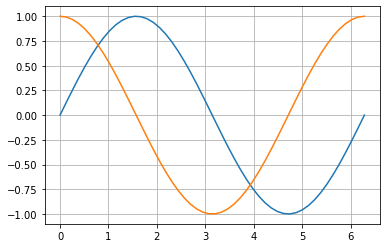

<Figure size 432x288 with 0 Axes>

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.linspace(0,2*np.pi,50,endpoint=True)
s1 = np.sin(t)
s2 = np.cos(t)

data = np.zeros((len(t),3))
data[:,0] = t
data[:,1] = s1
data[:,2] = s2

np.savetxt("sin_cos.csv",data,delimiter=",",header="t,Sinus,Cosinus",comments="")

plt.figure()
plt.plot(t,s1,t,s2)
plt.grid()
plt.show()
plt.savefig('LaFigure.png')

In [145]:
import pandas as pd
d = pd.read_csv("sin_cos.csv")
d.head()

,t,Sinus,Cosinus
0,0.000000,0.000000,1.000000
1,0.128228,0.127877,0.991790
2,0.256457,0.253655,0.967295
3,0.384685,0.375267,0.926917
4,0.512913,0.490718,0.871319


In [146]:
d.shape

(50, 3)

#### Manipulation de données :

In [147]:
test_list = ["BTS", "1", "SN", "2", "ec"] 
print("liste originale : " + str(test_list)) 
# Conversion chaine caractères en liste d'entiers et autres 
res = [int(ele) if ele.isdigit() else ele for ele in test_list] 
print("Liste après conversion : " + str(res)) 

liste originale : ['BTS', '1', 'SN', '2', 'ec']
Liste après conversion : ['BTS', 1, 'SN', 2, 'ec']


['103', '101', '102', '103']


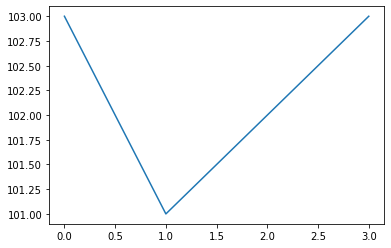

In [148]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Ch = ["a'103,10\\r\n", "b'101,14\\r\n", "c'102,16\\r\n", "d'103,18\\r\n"]

def nettoyage(Liste):
    newListe = []
    for i in range(len(Liste)):
        tempListe = Liste[i][2:]
        newListe.append(tempListe[:-6])
    return newListe
NCh = nettoyage(Ch)
print(NCh)

def ecrire(Liste):
    file = open("FichierTXT.txt",mode="w")
    for i in range(len(Liste)):
        file.write(Liste[i]+'\n')
    file.close()

ecrire(NCh)

val1 = np.loadtxt("FichierTXT.txt", unpack=True)

plt.figure()
plt.plot(val1)

__Remarque :__ Le délimiteur peut être un espace, un double espace | , ; \t ...

<a id="P115"></a>
### Lecture fichier texte :

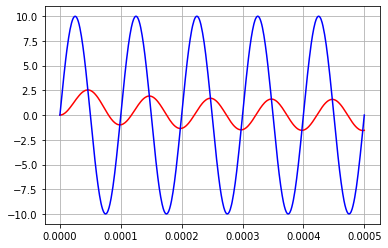

In [149]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f = open("txt/Donnees.txt" , 'r')
f.readline()
data = np.loadtxt(f)
f.close()

plt.figure()
plt.plot(data[:,0],data[:,1],"r-")
plt.plot(data[:,0],data[:,2],"b-")
plt.grid()
plt.show()

In [150]:
import pandas as pd

df = pd.read_csv('txt/Donnees.txt', sep='\s+')#'\s+', header=None, skiprows=1)
df.head()

,time,V(cap),V(source)
0,0.000000e+00,0.000000,0.000000
1,9.142857e-08,0.000038,0.057450
2,1.828571e-07,0.000135,0.114890
3,2.742857e-07,0.000293,0.172320
4,3.657143e-07,0.000511,0.229741


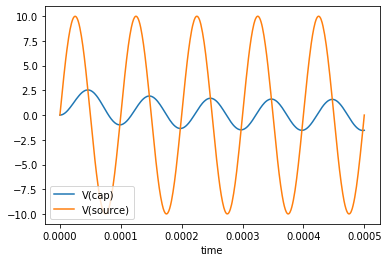

In [151]:
df.plot('time',['V(cap)','V(source)'])
plt.show()

<div style="border:thin solid green">
</div>

<a id="P2"></a>
## <cite><font color="C32F23"> Exercices : </font></cite>

---

<a id="P21"></a>
## <cite><font color="FBB903"> Exercice 1 : </font></cite>

Le code suivant génère les données "x" et "y" ("y" contient plusieurs colonnes)   

<div style="padding-top: 10px">
    <ul>
        <li> <b>Enregistrer ces données dans un seul fichier csv nommé Donnees.csv. </b></li>
        <li> <b>Ecrire un code pour lire ce fichier. </b></li>
        <li> <b>Lire les données contenues dans ce fichier. </b></li>
        <li> <b>Calculer la moyenne de la deuxième colonne de "y". </b></li>
        <li> <b>Tracer la deuxième colonne de "y" en fonction de "x". </b></li>
        <li> <b>Supprimer la 3ème colonne de "y" et enregistrer ce nouveau tableau dans un fichier csv nommé Donnees3.csv. </b></li>
     </ul>
</div>

<cite><font color="red"> Inscrire votre code dans les cellules ci-dessous : </font></cite>

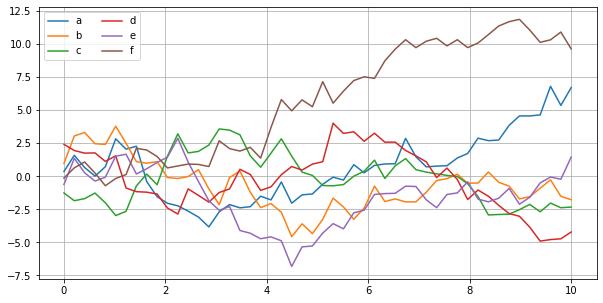

In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,50,endpoint=True)
y = np.cumsum(np.random.randn(50,6),0)

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.legend('abcdef', ncol=2, loc='upper left')
plt.grid()
plt.show()

---
<div style="padding-top: 10px">
    <ul>
        <li> <b>Enregistrer ces données dans un seul fichier csv nommé Donnees.csv. </b></li>
    </ul>
</div>

<div style="padding-top: 10px">
    <ul>
        <li> <b>Ecrire un code pour lire ce fichier. </b></li>
     </ul>
</div>

<div style="padding-top: 10px">
    <ul>
        <li> <b>Lire les données contenues dans ce fichier. </b></li>
</div>

<div style="padding-top: 10px">
    <ul>
        <li> <b>Calculer la moyenne de la deuxième colonne de "y". </b></li>
     </ul>
</div>

<div style="padding-top: 10px">
    <ul>
        <li> <b>Tracer la deuxième colonne de "y" en fonction de "x". </b></li>
     </ul>
</div>

<div style="padding-top: 10px">
    <ul>
        <li> <b>Supprimer la 3ème colonne de "y" et enregistrer ce nouveau tableau dans un fichier csv nommé Donnees3.csv. </b></li>
     </ul>
</div>

---
<a id="P22"></a>
## <cite><font color="FBB903"> Exercice 2 : </font></cite>

Soit la chaîne de caractère suivante :   
`"a'99.7;10\\r\n", "b'101;14\\r\n", "c'102;16\\r\n", "d'103;18\\r\n"`

- Ecrire un code pour extraire les chiffres contenus dans cette chaîne (x1 doit contenir les valeurs 99.7, 101, 102 et 103; et x2 doit contenir les autres valeurs : 10, 14, 16 et 18  
- Enregistrer ces chiffres dans un fichier texte nommé Texte.txt  
- Lire ce fichier texte et tracer x2 en fonction de x1

<cite><font color="red"> Inscrire votre code dans la cellule ci-dessous : </font></cite>

---
<a id="P23"></a>
## <cite><font color="FBB903"> Exercice 3 : </font></cite>

En utilisant la librairie __Pandas__, construire le tableau suivant :   

|    |Nom | Spécialité | CP | Chiffre1 | Chiffre2 | Date | Adresse|
|---:|---------:|---:|-------:|------:|----:|-----:|---:|
|0 | Nom1 | SN | 12000 | 1.5 | 10 | 12/03/2020 09:55 | 20 Rue A, Rodez, Av 12000|
|1 | Nom2 | IMRT | 31000 | 5.0 | 08 | 11/02/2020 11:01 | 1 Avenue B, Toulouse, Hg 31000|
|2 | Nom3 | IMRT | 75000 | 12.0 | 15 | 10/01/2020 13:30 | 5 Place C, Paris, Pa 75001|
|3 | Nom4 | SN | 12000 | 3.1 | 20 | 09/12/2019 17:25 | 3 Rue D, Rodez, Av 12OOO|

- Afficher ce tableau  

<cite><font color="red"> Inscrire votre code dans la cellule ci-dessous : </font></cite>

A partir de maintenant, vous allez travailler avec le fichier fourni : Fichier.csv (Voir mail ou GitHub)   

- Ecrire un code pour lire le fichier "Fichier.csv"   
- Ecrire un code pour extraire le jour à partir de la date et ajouter à la fin, la colonne Jour et afficher le tableau   
- Ecrire un code pour extraire le mois à partir de la date et ajouter à la fin, la colonne Mois et afficher le tableau   
- Ecrire un code pour extraire le nom de la ville à partir de l'adresse et ajouter à la fin, la colonne Ville et afficher le tableau   

Votre tableau doit ressembler à ça :

| |Nom | Spécialité | CP | Chiffre1 | Chiffre2 | Date | Adresse | Jour | Mois| Ville |
|---:|---------:|---:|-------:|------:|----:|-----:|---:|----:|---:| ---:|
|0 | Nom1 | SN | 12000 | 1.5 | 10 | 12/03/2020 09:55 | 20 Rue A, Rodez, Av 12000| 12 | 03 |Rodez|
|1 | Nom2 | IMRT | 31000 | 5.0 | 08 | 11/02/2020 11:01 | 1 Avenue B, Toulouse, Hg 31000| 11 | 02 |Toulouse|
|2 | Nom3 | IMRT | 75000 | 12.0 | 15 | 10/01/2020 13:30 | 5 Place C, Paris, Pa 75001| 10 | 01 |Paris|
|3 | Nom4 | SN | 12000 | 3.1 | 20 | 09/12/2019 17:25 | 3 Rue D, Rodez, Av 12OOO| 09 | 12 |Rodez|



- __Ecrire un code pour lire le fichier "Fichier.csv"__

- __Ecrire un code pour extraire le jour à partir de la date et ajouter à la fin, la colonne Jour et afficher le tableau__

- __Ecrire un code pour extraire le mois à partir de la date et ajouter à la fin, la colonne Mois et afficher le tableau__

- __Ecrire un code pour extraire le nom de la ville à partir de l'adresse et ajouter à la fin, la colonne Ville et afficher le tableau__

- Supprimer la colonne Jour   
- Changer le format de la date (Voir ReadMe.md)   
- Ecrire un code pour extraire les heures à partir de la date et ajouter à la fin, la colonne Heure et afficher le tableau   
- Ecrire un code pour extraire les minutes à partir de la date et ajouter à la fin, la colonne Minute et afficher le tableau

Votre tableau doit ressembler à ça :

| |Nom | Spécialité | CP | Chiffre1 | Chiffre2 | Date | Adresse| Mois| Ville |Heure|Minute|
|---:|---------:|---:|-------:|------:|----:|-----:|---:|----:|---:| ---:|---:|
|0 | Nom1 | SN | 12000 | 1.5 | 10 | 2020-12-03 09:55:00 | 20 Rue A, Rodez, Av 12000| 03 |Rodez|09|55|
|1 | Nom2 | IMRT | 31000 | 5.0 | 08 | 2020-11-02 11:01:00 | 1 Avenue B, Toulouse, Hg 31000| 02 |Toulouse|11|01|
|2 | Nom3 | IMRT | 75000 | 12.0 | 15 | 2020-10-01 13:30:00 | 5 Place C, Paris, Pa 75001| 01 |Paris|13|30|
|3 | Nom4 | SN | 12000 | 3.1 | 20 | 2019-09-12 17:25:00 | 3 Rue D, Rodez, Av 12OOO| 12 |Rodez|17|25|

- __Supprimer la colonne Jour__

- __Changer le format de la date__ 

- __Ecrire un code pour extraire les heures à partir de la date et ajouter à la fin, la colonne Heure et afficher le tableau__

- __Ecrire un code pour extraire les minutes à partir de la date et ajouter à la fin, la colonne Minute et afficher le tableau__

En utilisant l'instruction `type`, on remarque que la colonne "Mois" est de type `string`. De même pour la colonne "Chiffre2".  

```python
print(type(NomDeVotreTableau['Mois'][0]))
```

`<class 'str'>`

- Ecrire un code pour mettre au format `integer` la colonne "Mois" et vérifier les résultats   
- Ecrire un code pour mettre au bon format `integer` la colonne "Chiffre2" et vérifier les résultats   

| |Nom | Spécialité | CP | Chiffre1 | Chiffre2 | Date | Adresse| Mois| Ville |Heure|Minute|
|---:|---------:|---:|-------:|------:|----:|-----:|---:|----:|---:| ---:|---:|
|0 | Nom1 | SN | 12000 | 1.5 | 10 | 2020-12-03 09:55:00 | 20 Rue A, Rodez, Av 12000| 3 |Rodez|09|55|
|1 | Nom2 | IMRT | 31000 | 5.0 | 8 | 2020-11-02 11:01:00 | 1 Avenue B, Toulouse, Hg 31000| 2 |Toulouse|11|01|
|2 | Nom3 | IMRT | 75000 | 12.0 | 15 | 2020-10-01 13:30:00 | 5 Place C, Paris, Pa 75001| 1 |Paris|13|30|
|3 | Nom4 | SN | 12000 | 3.1 | 20 | 2019-09-12 17:25:00 | 3 Rue D, Rodez, Av 12OOO| 12 |Rodez|17|25|

- __Ecrire un code pour mettre au format `integer` la colonne "Mois" et vérifier vos résultats__

- __Ecrire un code pour mettre au bon format `integer` la colonne "Chiffre2" et vérifier vos résultats__

> __Remarque :__    
Le logiciel nous informe que la colonne "Chiffre2" est de `<class 'int'>` qui n'a rien avoir avec les entiers.    Si la colonne "Chiffre2" ne contient que des entiers, le logiciel doit afficher `<class 'numpy.int64'>` ou `<class 'numpy.int32'>` (voir les résultats de la conversion de la colonne "Mois")

- __Ajouter une colonne pour calculer la moyenne entre le "Chiffre1" et le "Chiffre2"__   
- __Enregistrer votre fichier dans un fichier csv nommé FichierResultat.csv__   